In [1]:
import numpy as np 
import pandas as pd
import h5py
import matplotlib.pyplot as plt 
import pylab
from pandas import read_csv
import os

In [2]:
def plot_noise():    
    plt.title(os.path.basename(hdf5_path))
    plt.plot(time, strain_noise)
    plt.xlabel('GPS Time (s)')
    plt.ylabel('Strain')
    pylab.grid(True)
    plt.show()

In [3]:
#GRAFICAR SAMPLE
def plot_sample():
    pylab.plot(t,h,linewidth=2.0)
    plt.title(os.path.basename(gw_path))
    pylab.xlabel('Time (s)',fontsize=18,color='black')
    pylab.ylabel('Strain',fontsize=18,color='black')
    pylab.grid(True)
    plt.show()

In [4]:
def plot_resampled_signalnoise():
    plt.figure(2)
    axes = plt.gca()
    plt.title(f"No Hardware Injection\n Noise: {os.path.basename(hdf5_path)}")
    plt.plot(sampled_x, y_noise, 
             linewidth=1.0)
    plt.xlabel('Time (s)', fontsize=18, color='black')
    plt.ylabel('Strain', fontsize=18, color='black')
    plt.grid(True)
    
    plt.figure(3)
    axes = plt.gca()
    plt.title(f"Hardware Injection\n Noise: {os.path.basename(hdf5_path)}\n Signal: {os.path.basename(gw_path)}")
    plt.plot(sampled_x, injected_y,
             linewidth=1.0)
    plt.xlabel('Time (s)', fontsize=18, color='black')
    plt.ylabel('Strain', fontsize=18, color='black')
    plt.grid(True)
    plt.show()

In [5]:
#IMPORTAR DATA SAMPLE
gw_path = 'signal_e15a_ls.dat'

t        = np.loadtxt(gw_path,usecols=(0)) # ms
h        = np.loadtxt(gw_path,usecols=(1)) # 10 Kpc

#regla de tres
t        = t/1000    # s
h        = h*10      # 1 Kpc

gw_ts = t[1] - t[0]
print("Signal Time Sample (s):", gw_ts)
print("Signal Time Shape (s):", np.loadtxt(gw_path).shape)

Signal Time Sample (s): 4.4898388e-05
Signal Time Shape (s): (8192, 2)


In [7]:
#IMPORTAR NOISE HDF5
hdf5_path = fileName = 'L-L1_GWOSC_O2_4KHZ_R1-1185669120-4096.hdf5'
dataFile = h5py.File(fileName, 'r')

strain_noise = dataFile['strain']['Strain'].value
strain_ts = dataFile['strain']['Strain'].attrs['Xspacing']
strain_meta = dataFile['meta']
print("Noise Time Sample (s)", strain_ts)
print("Noise Time Shape: ", strain_noise.shape)

Noise Time Sample (s) 0.000244140625
Noise Time Shape:  (16777216,)


In [8]:
#Features NOISE
gpsStart = strain_meta['GPSstart'].value
duration = strain_meta['Duration'].value
gpsEnd   = gpsStart + duration
time = np.arange(gpsStart, gpsEnd, strain_ts)

In [9]:
#GUARDAR SAMPLE EN CSV
cols = np.empty((len(t), 2))
cols[:, 0] = t
cols[:, 1] = h
c = np.savetxt('%s.csv' % os.path.basename(gw_path), 
               cols, delimiter =' ', header = "time, strain",
               comments="")
series = read_csv('%s.csv' % os.path.basename(gw_path), 
                  delim_whitespace=True)
series.columns = ['time', 'strain']
series.to_csv('%s.csv' % os.path.basename(gw_path), sep = ' ', index = False)

In [10]:
#RESAMPLEAR EL ARCHIVO CSV
series = read_csv('%s.csv' % os.path.basename(gw_path), 
                  delim_whitespace=True, index_col = 0)
#lo convierte a datetime de segundos
series.index = pd.to_datetime(series.index, unit='s')
#downsample
downsampled = series.resample('244140ns').ffill()
sampled_y = downsampled['strain'].to_numpy()
sampled_x = np.arange(0, strain_ts * len(sampled_y), strain_ts)

In [11]:
#GENERAR CSV RESAMPLEADO
cols = np.empty((len(sampled_x), 2))
cols[:, 0] = sampled_x
cols[:, 1] = sampled_y
c = np.savetxt('%s_resampled.csv' % os.path.basename(gw_path), cols, delimiter =' ', header = "time, strain", comments="")
series = read_csv('%s_resampled.csv' % os.path.basename(gw_path), delim_whitespace=True)
series.columns = ['time', 'strain']
series.to_csv('%s_resampled.csv' % os.path.basename(gw_path), sep = ' ', index = False)

In [12]:
#AGREGAR RUIDO AL CSV RESAMPLEADO
numSamples = len(sampled_x)
y_noise = strain_noise[0:numSamples]
injected_y = sampled_y + y_noise

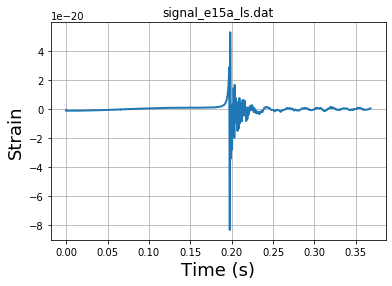

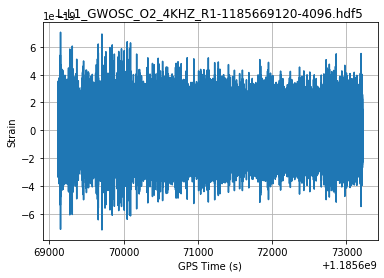

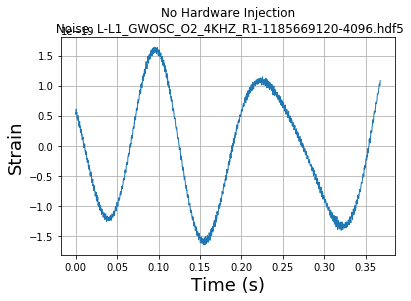

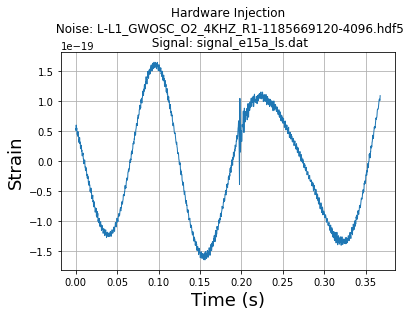

In [13]:
plot_sample()
plot_noise()
plot_resampled_signalnoise()